**Integrantes:**
- Deissy Cancino Joya
- Ana María Patiño Cano
- Bairon Gómez Peñuela

**Preguntas de interés**

o	¿Qué librerías tiene Python para el manejo de figuras o gráficas?
Ofrece varias librerías pero algunas de las más comunes son: Matplotlib, seaborn, Plotly, Pandas Plotting, entre otras.

o	¿Qué tipos de gráficas existen y cuándo debo usar la una o la otra?
Existen varios pero algunos de los más comunes serían:
- Diagramas de dispersión: Muestra relación de dos variables, se identifican patrones y relaciones
- Líneas: muestran tendencias a lo largo del tiempo
- Histogramas: Muestran la distribución de una variable  
- Barras: Comparan categorías y diferencias entre ellas


o	¿Cuál es la diferencia fundamental entre generar una figura automáticamente y hacerlo usando objetos?
La diferencia radica en el nivel de control y personalización que se puede tener sobre la figura. Si se desea crear gráficos rápidos y sencillos para una visualización rápida de datos, el enfoque automático sería pertinente. Por otro lado, si se requiere una personalización precisa o se desea crear gráficos más complejos, trabajar con objetos podría proporcionar mayor grado de control y flexibilidad.


o	¿Cómo puedo configurar los colores, títulos y otros elementos de una figura?
Utilizando métodos y funciones de bibliotecas como Matplotlib como por ejemplo: para colores "color", para títulos "plt.title(), plt.xlabel() y plt.ylabel()", para leyendas "plt.legen()", entre otros.

**RETO PARTE 1**

1. Se elige información de http://data.un.org/, de México y Brasil, respecto a el dataset Demographics Statistics database: Deaths by age, sex and urban/rural residence, años 2010 y 2020.

2. Realice los cálculos necesarios y genere las siguientes gráficas:

-	Muertes por año por país
- Muertes por sexo por país
- Muertes por edad por país

3. Configure las figuras de la manera más agradable visualmente que pueda.


In [ ]:
# cargar datos desde google drive
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


drive.mount('/content/drive', force_remount=True)
mexico_2010_path = '/content/drive/MyDrive/Colab Notebooks/Reto 11 y 12/mexico_2010.csv'
mexico_2020_path = '/content/drive/MyDrive/Colab Notebooks/Reto 11 y 12/mexico_2020.csv'
brasil_2010_path = '/content/drive/MyDrive/Colab Notebooks/Reto 11 y 12/brasil_2010.csv'
brasil_2020_path = '/content/drive/MyDrive/Colab Notebooks/Reto 11 y 12/brasil_2020.csv'


Mounted at /content/drive


In [ ]:
#Leer la base de brasil 2020
brasil_2020 = pd.read_csv(brasil_2020_path, sep=',', quotechar='"', header=None)
brasil_2020 = brasil_2020.apply(lambda x: x.str.replace(', ', '/'))
brasil_2020 = brasil_2020[0].str.split(',', expand=True)
brasil_2020 = brasil_2020.apply(lambda x: x.str.replace('"', ''))
brasil_2020.columns = brasil_2020.iloc[0]
brasil_2020 = brasil_2020[1:]
brasil_2020.reset_index(drop=True, inplace=True)


#Leer la base de méxico 2020
mexico_2020 = pd.read_csv(mexico_2020_path, sep=',', quotechar='"', header=None)
mexico_2020 = mexico_2020.apply(lambda x: x.str.replace(', ', '/'))
mexico_2020 = mexico_2020[0].str.split(',', expand=True)
mexico_2020 = mexico_2020.apply(lambda x: x.str.replace('"', ''))
mexico_2020.columns = mexico_2020.iloc[0]
mexico_2020 = mexico_2020[1:]
mexico_2020.reset_index(drop=True, inplace=True)

#Leer la base de brasil 2010
brasil_2010 = pd.read_csv(brasil_2010_path, sep=',', quotechar='"', header=None)
brasil_2010 = brasil_2010.apply(lambda x: x.str.replace(', ', '/'))
brasil_2010 = brasil_2010[0].str.split(',', expand=True)
brasil_2010 = brasil_2010.apply(lambda x: x.str.replace('"', ''))
brasil_2010.columns = brasil_2010.iloc[0]
brasil_2010 = brasil_2010[1:]
brasil_2010.reset_index(drop=True, inplace=True)
brasil_2010

#Leer la base de mexico 2010
mexico_2010 = pd.read_csv(mexico_2010_path, sep=',', quotechar='"', header=None)
mexico_2010 = mexico_2010.apply(lambda x: x.str.replace(', ', '/'))
mexico_2010 = mexico_2010[0].str.split(',', expand=True)
mexico_2010 = mexico_2010.apply(lambda x: x.str.replace('"', ''))
mexico_2010.columns = mexico_2010.iloc[0]
mexico_2010 = mexico_2010[1:]
mexico_2010.reset_index(drop=True, inplace=True)
mexico_2010

# Concatenar los DataFrames
concatenar_bases = pd.concat([brasil_2010, brasil_2020, mexico_2010, mexico_2020], ignore_index=True)
concatenar_bases

#concatenar solo las filas con el país inicialmente y excluir las de age "Total"
base_filtrada = concatenar_bases.loc[(concatenar_bases['Country'].isin(['Brazil', 'Mexico'])) & (~concatenar_bases['Age'].str.contains(r'Total', case=False, na=False))]

base_filtrada = base_filtrada.copy()
base_filtrada['Year'] = pd.to_numeric(base_filtrada['Year'], errors='coerce')
base_filtrada['Cantidad'] = pd.to_numeric(base_filtrada['Cantidad'], errors='coerce')
base_filtrada['Source Year'] = pd.to_numeric(base_filtrada['Source Year'], errors='coerce')
base_filtrada


0    Country  Year   Area         Sex      Age  \
1     Brazil  2010  Total  Both Sexes        0   
2     Brazil  2010  Total  Both Sexes    1 - 4   
3     Brazil  2010  Total  Both Sexes    5 - 9   
4     Brazil  2010  Total  Both Sexes  10 - 14   
5     Brazil  2010  Total  Both Sexes  15 - 19   
...      ...   ...    ...         ...      ...   
1325  Mexico  2020  Total      Female       97   
1326  Mexico  2020  Total      Female       98   
1327  Mexico  2020  Total      Female       99   
1328  Mexico  2020  Total      Female    100 +   
1329  Mexico  2020  Total      Female  Unknown   

0                                Record Type            Reliability  \
1               Vital statistics from census         Other estimate   
2               Vital statistics from census         Other estimate   
3               Vital statistics from census         Other estimate   
4               Vital statistics from census         Other estimate   
5               Vital statistics from census         Other estimate   
...                                      ...                    ...   
1325  Data tabulated by year of registration  Final figure/complete   
1326  Data tabulated by year of registration  Final figure/complete   
1327  Data tabulated by year of registration  Final figure/complete   
1328  Data tabulated by year of registration  Final figure/complete   
1329  Data tabulated by year of registration  Final figure/complete   

0     Source Year  Cantidad Value Footnotes None  
1            2011     35055               1  NaN  
2            2011      8728               1  NaN  
3            2011      5033               1  NaN  
4            2011      6392               1  NaN  
5            2011     21781               1  NaN  
...           ...       ...             ...  ...  
1325         2022      2499               1    2  
1326         2022      1885               1    2  
1327         2022      1480               1    2  
1328         2022      3152               1    2  
1329         2022       157               1    2  

[1305 rows x 11 columns]

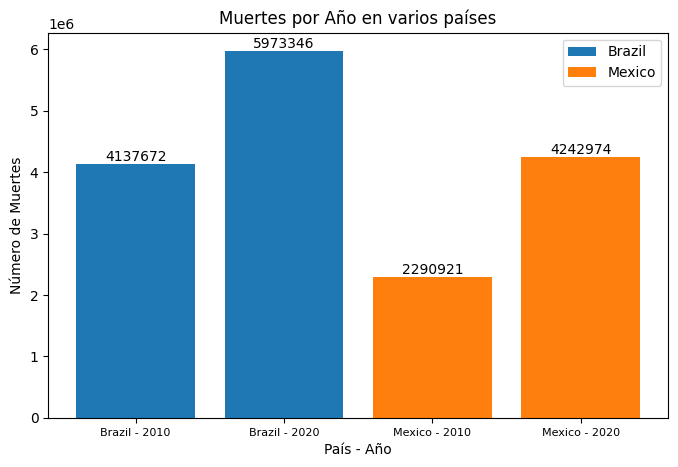

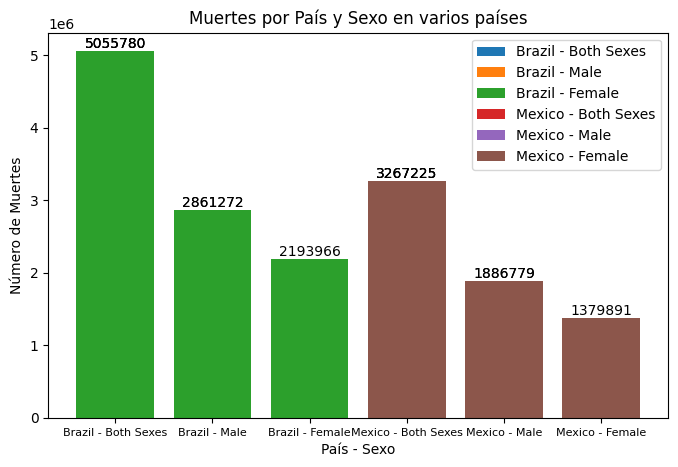

<Figure size 800x500 with 0 Axes>

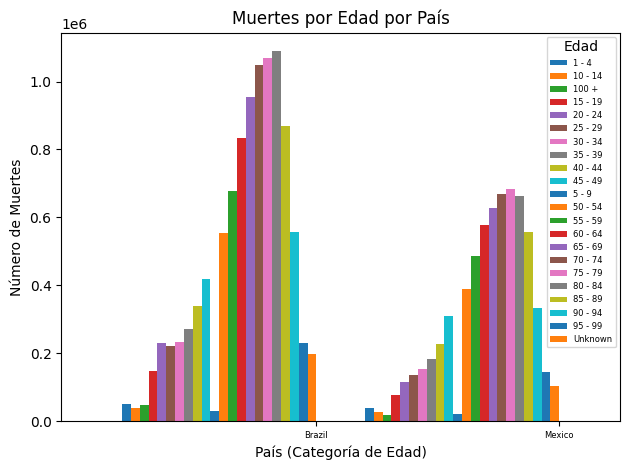

In [ ]:
# 1) Función para visualizar muertes por año por país
def deaths_by_year(data, country_names):
  plt.figure(figsize=(8, 5))

  for country_name in country_names:
        df = data[data['Country'] == country_name]
        year_sums = df.groupby(['Country', 'Year'])['Cantidad'].sum() #Revisar porque no suma bien la cantidad
        years = year_sums.index.get_level_values('Year')

        # Generar el gráfico de barras para el país actual
        bar_labels = [f'{country_name} - {year}' for year in years]
        bars = plt.bar(bar_labels, year_sums, label=country_name)

        # Agregar etiquetas con la cantidad de muertes en cada barra
        for bar, value in zip(bars, year_sums):
            plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')


  plt.xlabel('País - Año')
  plt.ylabel('Número de Muertes')
  plt.title('Muertes por Año en varios países')
  plt.legend()
  plt.xticks(fontsize=8)
plt.show()
deaths_by_year(base_filtrada, ['Brazil', 'Mexico'])


#2 Función para visualizar muertes por sexo por país
def deaths_by_country_sex(data, country_names):
    plt.figure(figsize=(8, 5))

    for country_name in country_names:
        df = data[data['Country'] == country_name]
        sexes = df['Sex'].unique()

        # Diccionario para almacenar las sumas de cantidades por combinación de país y sexo
        sums = {}

        for sex in sexes:
            sex_counts = df[df['Sex'] == sex]
            sex_sum = sex_counts['Cantidad'].sum()
            key = f'{country_name} - {sex}'
            sums[key] = sex_sum


            # Generar el gráfico de barras
            plt.bar(sums.keys(), sums.values(), label=f'{country_name} - {"Male" if sex == "Male" else "Female" if sex == "Female" else "Both Sexes"}')
            for key, value in sums.items():
              plt.text(key, value, str(value), ha='center', va='bottom')

    plt.xlabel('País - Sexo')
    plt.ylabel('Número de Muertes')
    plt.title('Muertes por País y Sexo en varios países')
    plt.legend()

    # Ajustar el tamaño de las etiquetas del eje x
    plt.xticks(rotation=0, fontsize=8)

    plt.show()
deaths_by_country_sex(base_filtrada, ['Brazil', 'Mexico'])




# 3) Muertes por edad por país
#Hay que agrupar la cantidad de edades en grupos que ya están algunos estructurados en un for, algo así:
def age_group(age):
    if not age.isnumeric():
        return age  # Mantén el valor original si no es numérico
    age = int(age)
    if age < 1:
        return "Unknown"  # Si el valor es negativo o no numérico
    elif age <= 4:
        return "1 - 4"
    elif age <= 9:
        return "5 - 9"
    elif age <= 14:
        return "10 - 14"
    elif age <= 19:
        return "15 - 19"
    elif age <= 24:
        return "20 - 24"
    elif age <= 29:
        return "25 - 29"
    elif age <= 34:
        return "30 - 34"
    elif age <= 39:
        return "35 - 39"
    elif age <= 44:
        return "40 - 44"
    elif age <= 49:
        return "45 - 49"
    elif age <= 54:
        return "50 - 54"
    elif age <= 59:
        return "55 - 59"
    elif age <= 64:
        return "60 - 64"
    elif age <= 69:
        return "65 - 69"
    elif age <= 74:
        return "70 - 74"
    elif age <= 79:
        return "75 - 79"
    elif age <= 84:
        return "80 - 84"
    elif age <= 89:
        return "85 - 89"
    elif age <= 94:
        return "90 - 94"
    elif age <= 99:
        return "95 - 99"
    else:
        return "100+"


muertes_edad_pais = base_filtrada.groupby(['Country', 'Age Group'])['Cantidad'].sum().unstack()

# Ajusta el tamaño de la figura
plt.figure(figsize=(8, 5))

muertes_edad_pais.plot(kind='bar', width=0.8, position=1)  # Ajusta el ancho de las barras y la posición

# Etiquetas personalizadas en el eje x
xticks_labels = muertes_edad_pais.index.get_level_values('Country')
plt.xticks(range(len(muertes_edad_pais.index.get_level_values('Country').unique())), xticks_labels.unique(), rotation=0, ha='center', fontsize=6)


plt.title('Muertes por Edad por País')
plt.xlabel('País (Categoría de Edad)')
plt.ylabel('Número de Muertes')
plt.legend(title='Edad', loc='upper right', fontsize=6)
plt.tight_layout()  # Ajusta el diseño para mostrar todas las etiquetas
plt.show()


In [ ]:
#SEGUNDA PARTE DEL RETO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


# cargar datos desde google drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/MyDrive/Colab Notebooks/Reto 9 y 10/database.csv"
#La columna Perpetrator Age se debe importar como str porque presenta problemas con los valores
data = pd.read_csv(path, dtype={'Perpetrator Age': str})

In [ ]:
#realizaremos una copia de la base para no dañar la original
data2 = data.copy()
#Para que las etiquetas de las columnas de puedan leer correctamente, remplazamos los espacios por guión bajo.
data2.columns = data2.columns.str.replace(' ', '_')
data2

# 1) Estados más afectados por crímenes perpetrados de acuerdo al sexo.
state_sex = data2.groupby(['State', 'Perpetrator_Sex'])['Record_ID'].count().unstack()
state_sex.plot(kind='bar', stacked=True)
plt.title('Crímenes por Estado y Sexo del Perpetrador')
plt.xlabel('Estado')
plt.ylabel('Número de Crímenes')
plt.legend(title='Sexo del Perpetrador')
plt.tight_layout()
plt.figure()

# 2) Número de crímenes de acuerdo al género y la raza.
gender_race = data2.groupby(['Perpetrator_Sex', 'Perpetrator_Race'])['Record_ID'].count().unstack()
ax = gender_race.plot(kind='bar', stacked=True)
plt.title('Crímenes por Género y Raza del Perpetrador')
plt.xlabel('Género del Perpetrador')
plt.ylabel('Número de Crímenes')
plt.legend(title='Raza del Perpetrador')
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
plt.tight_layout()
plt.figure()

# 3) Crímenes hispanos según el tipo de asesinato.
hispanic_crime_type = data2[data2['Victim_Ethnicity'] == 'Hispanic'].groupby('Crime_Type')['Record_ID'].count()
ax = hispanic_crime_type.plot(kind='bar')
plt.title('Crímenes contra Víctimas Hispanas por Tipo de Asesinato')
plt.xlabel('Tipo de Asesinato')
plt.ylabel('Número de Crímenes')
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
plt.tight_layout()
plt.figure()

# 4) Víctimas por tipo de raza.
victim_race = data2.groupby('Victim_Ethnicity')['Record_ID'].count()
ax = victim_race.plot(kind='bar')
plt.title('Víctimas por Tipo de Raza')
plt.xlabel('Tipo de Raza de la Víctima')
plt.ylabel('Número de Víctimas')
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
plt.tight_layout()
plt.figure()

# 5) Víctimas por tipo de asesinato.
victim_crime_type= data2.groupby('Crime_Type')['Victim_Count'].sum()
ax = victim_crime_type.plot(kind='bar')
plt.title('Víctimas por Tipo de Asesinato')
plt.xlabel('Tipo de Asesinato')
plt.ylabel('Número de Víctimas')
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
plt.tight_layout()

plt.show()